In [20]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df=pd.read_csv('../datasets/llm_bert_clusters.csv')

In [3]:
df.shape

(25098, 11)

In [4]:
df=df[df['naed']!=0]

In [5]:
df['naed'].value_counts()

naed
2    5253
5    4177
4    4075
7    3827
1    3747
3    1845
6    1818
Name: count, dtype: int64

In [6]:
df.shape

(24742, 11)

# Checking Human Labeling

In [8]:
labeled=pd.read_csv('../datasets/human_labelling.csv')

In [9]:
labeled=labeled[['Unnamed: 0', 'title', 'NER_list', 'filtered_verbs', 'HumanLabelling']]

In [11]:
df.columns

Index(['Unnamed: 0', 'title', 'NER_list', 'filtered_verbs', 'umap_x', 'umap_y',
       'dish_type_response', 'naed', 'naed_label', 'hier', 'hier_label'],
      dtype='object')

In [12]:
merged = pd.merge(labeled, df, left_on='title', right_on='title', how='left')

In [13]:
merged.shape

(1000, 15)

In [14]:
merged.rename(columns={'HumanLabelling':'humanlabeling'},inplace=True)
merged=merged[~merged['humanlabeling'].isna()]

In [30]:
merged.to_csv("../datasets/llm_clusters_human.csv")

### LLM

In [17]:
confusion_df = pd.crosstab(merged['naed'], merged['humanlabeling'], rownames=['LLM'], colnames=['HumanLabels'])
print(confusion_df)

HumanLabels   1    2   3    4    5   6    7
LLM                                        
1            74   43   3   15   10   0   10
2             4  183  13    6    3   0    0
3             0   11  46    9    2   0    0
4             5    6   9  111   24   1    6
5            11    6   2   12  131   3   22
6             0    3   1   13    7  36    5
7             1    3   1    9   11   7  122


In [18]:
print(merged['naed'].isna().sum())
print(merged['humanlabeling'].isna().sum())

0
0


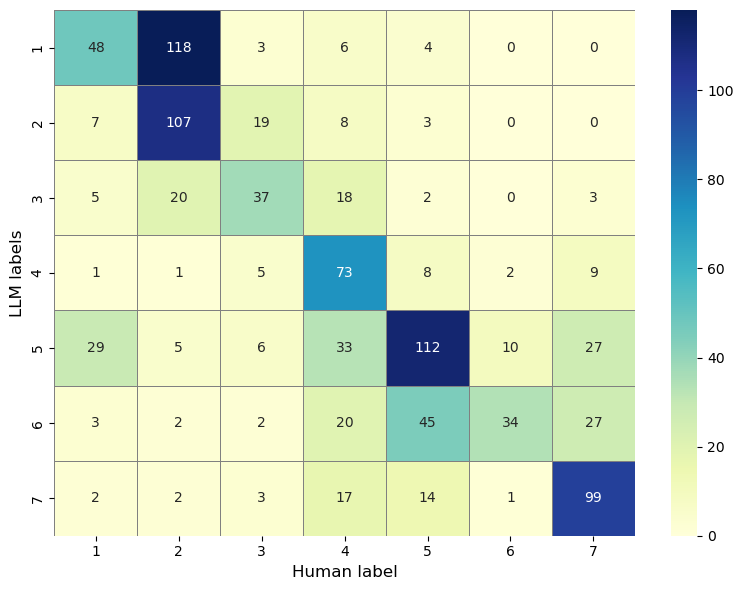

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.xlabel('Human label', fontsize=12)
plt.ylabel('LLM labels', fontsize=12)
plt.tight_layout()
plt.savefig('../images/conf_matrix_llm_human.png')
plt.show()

In [21]:
# drop nans
filtered = merged.dropna(subset=['naed', 'humanlabeling'])

y_true = filtered['humanlabeling'].astype(int)
y_pred = filtered['naed'].astype(int)

In [22]:
# Accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# Precision, recall, F1-score per class
report = classification_report(y_true, y_pred, digits=3)
print(report)

Accuracy: 0.703
              precision    recall  f1-score   support

           1      0.477     0.779     0.592        95
           2      0.876     0.718     0.789       255
           3      0.676     0.613     0.643        75
           4      0.685     0.634     0.659       175
           5      0.701     0.697     0.699       188
           6      0.554     0.766     0.643        47
           7      0.792     0.739     0.765       165

    accuracy                          0.703      1000
   macro avg      0.680     0.707     0.684      1000
weighted avg      0.728     0.703     0.709      1000



### BERT

In [23]:
confusion_df = pd.crosstab(merged['hier'], merged['humanlabeling'], rownames=['BERT'], colnames=['HumanLabels'])
print(confusion_df)

HumanLabels   1    2   3   4    5   6   7
BERT                                     
1            48  118   3   6    4   0   0
2             7  107  19   8    3   0   0
3             5   20  37  18    2   0   3
4             1    1   5  73    8   2   9
5            29    5   6  33  112  10  27
6             3    2   2  20   45  34  27
7             2    2   3  17   14   1  99


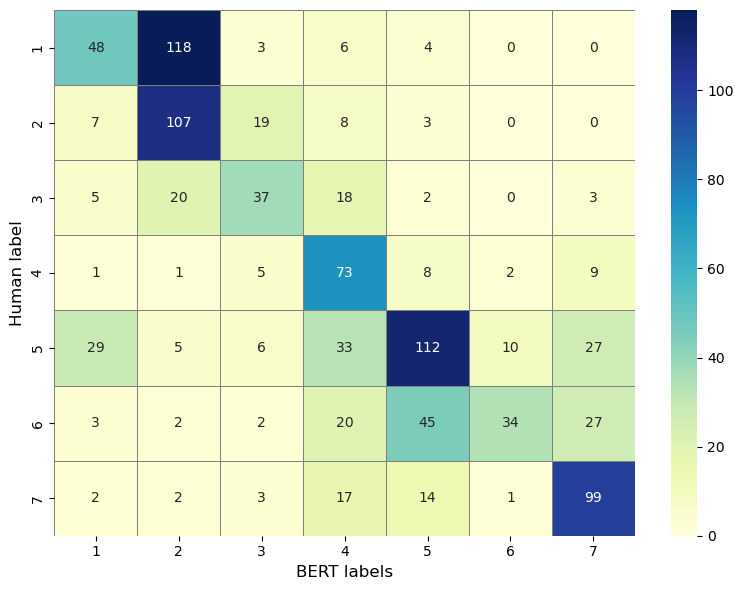

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.xlabel('BERT labels', fontsize=12)
plt.ylabel('Human label', fontsize=12)
plt.tight_layout()
plt.savefig('../images/conf_matrix_bert_human.png')
plt.show()


In [27]:
filtered = merged.dropna(subset=['naed', 'hier'])
y_true = filtered['humanlabeling'].astype(int)
y_pred = filtered['hier'].astype(int)

In [28]:
# accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

report = classification_report(y_true, y_pred, digits=3)
print(report)

Accuracy: 0.51
              precision    recall  f1-score   support

           1      0.268     0.505     0.350        95
           2      0.743     0.420     0.536       255
           3      0.435     0.493     0.463        75
           4      0.737     0.417     0.533       175
           5      0.505     0.596     0.546       188
           6      0.256     0.723     0.378        47
           7      0.717     0.600     0.653       165

    accuracy                          0.510      1000
   macro avg      0.523     0.536     0.494      1000
weighted avg      0.602     0.510     0.526      1000



In [ ]:
trial=merged.copy()

In [ ]:
trial.columns

Index(['Unnamed: 0_x', 'title_x', 'NER_list_x', 'filtered_verbs_x',
       'humanlabeling', 'Unnamed: 0.1', 'Unnamed: 0_y', 'title_y',
       'ingredients', 'directions', 'link', 'source', 'NER', 'NER_list_y',
       'NER_len', 'directions_len', 'title_lower', 'NER_clean',
       'ingredients_str', 'cluster', 'verbs', 'lemmed_verbs',
       'filtered_verbs_y', 'set_verbs', 'clean_direction', 'pairs',
       'pairs_set', 'umap_x', 'umap_y', 'cluster_hier', 'cluster_label',
       'text_snippet', 'dish_type_response', 'naed', 'naed_label',
       'hier_label', 'map_naed'],
      dtype='object')

In [ ]:
trial=trial[(trial['naed']==2) & (trial['humanlabeling']==5)][['Unnamed: 0_x','title_x','NER_list_x','naed','humanlabeling']]

In [ ]:
print(trial)

     Unnamed: 0_x                                            title_x  \
13          16690                Noodles And Shredded Herbed Carrots   
22           9240                                       Filbert Yams   
35           9762                   From Italy: Easy Pasta Carbonara   
41          11103  Green Mountain Rice(From Marcliff Poultry Farm...   
60          12829                     Jean'S Quick 'N Easy Casserole   
73           8366          Easy Lasagna with Mushrooms & White Sauce   
115         13805                     Lemon-Chili Chicken With Penne   
123         23606                      Tortellini Sauce-Tomato Based   
141         10319   Glazed Carrots With Maple Syrup And Sesame Seeds   
183         22248                           Stuffed Monster Zucchini   
222         11043                                 Green Bean Special   
233         16602                     No More Plain Jane Green Beans   
240           527                          Airport Bob'S Green B